# Cloud Spread in ODT

In [3]:
# Monte Carlo Sampling for Atoms Initial Positions and Velocities in ODT

import os


working_directory = "D:/PhD_Trieste/Simulations/Imaging_Simulation"

if os.getcwd()!= working_directory:
    os.chdir(working_directory)  
    
print(working_directory)

import Simulations_Libraries.trajectory_library as trajlib
import numpy as np
import matplotlib.pyplot as plt
from Camera import *
from scipy.stats import poisson
from scipy.optimize import curve_fit
import Simulations_Libraries.general_library as genlib
import scipy.constants as const
import matplotlib.cm as cm
%matplotlib

plt.ion()




normal = ""
usedCase = normal




'''-----------------------------------atom----------------------------------'''
nOfAtoms = 20000
isotope = 171
baseAtom = trajlib.Ytterbium(0,0,0, 0,0,0,isotope=isotope)

#initialT =np.arange(10,105,5)*1e-6
#initialT = np.array([50])*1e-6
initialT = 1e-6

h = const.physical_constants["Planck constant"] [0]
hbar = h/(2*np.pi)
kB = const.physical_constants["Boltzmann constant"][0]




'''-------------------------------Tweezer laser-----------------------------'''

ODTWaist = 14e-6
ODTIntensity = 300e-6*trajlib.kB # ODT depth in J
ODTLambda = 759e-9 # ODT wavelength in m
'''
# ODT Parameters
k = 1

painting = False

trapFreqX =np.sqrt((1 + k**4)/2) * 2 * np.pi * 30 
trapFreqY = 2*np.pi*2.7e3 
trapFreqZ = k * 2*np.pi*2.7e3


if painting:
    paintingFactor = 3
    trapFreqY = trapFreqY/paintingFactor
'''

# Free run 
freqPerp = 100
trapFreqX =2 * np.pi * freqPerp
trapFreqY = 2*np.pi* freqPerp
trapFreqZ = 2*np.pi*3e3


n_0X = trajlib.n_T(trapFreqX,initialT)
n_0Y = trajlib.n_T(trapFreqY,initialT)
n_0Z = trajlib.n_T(trapFreqZ,initialT)

x_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqX)*(2*n_0X+1))
y_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqY)*(2*n_0Y+1))
z_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqZ)*(2*n_0Z+1))
    
v_x_rms = np.sqrt(trajlib.hbar*trapFreqX/(2*baseAtom.m)*(2*n_0X+1))
v_y_rms = np.sqrt(trajlib.hbar*trapFreqY/(2*baseAtom.m)*(2*n_0Y+1))
v_z_rms = np.sqrt(trajlib.hbar*trapFreqZ/(2*baseAtom.m)*(2*n_0Z+1))

RelErrorPositionsRMS = []
RelErrorVelocitiesRMS = []


atomPositions = []
atomVelocities = []
    
    
for i in range(nOfAtoms):
        
    atomPositions.append(np.random.normal(0, [x_rms, y_rms, z_rms], size=(3)))
    atomVelocities.append(np.random.normal(0, [v_x_rms, v_y_rms, v_z_rms], size=(3)))
			
atomPositions = np.asarray(atomPositions)
atomVelocities = np.asarray(atomVelocities)
    

        
    
x_rms_MC = np.sqrt(np.mean(atomPositions[:,0]**2))
y_rms_MC = np.sqrt(np.mean(atomPositions[:,1]**2))
z_rms_MC = np.sqrt(np.mean(atomPositions[:,2]**2))
    
v_x_rms_MC = np.sqrt(np.mean(atomVelocities[:,0]**2))
v_y_rms_MC = np.sqrt(np.mean(atomVelocities[:,1]**2))
v_z_rms_MC = np.sqrt(np.mean(atomVelocities[:,2]**2))
   

RelErrorPositionsRMS = np.array([x_rms_MC/x_rms, y_rms_MC/y_rms, z_rms_MC/z_rms])
RelErrorVelocitiesRMS = np.array([v_x_rms_MC/v_x_rms, v_y_rms_MC/v_y_rms, v_z_rms_MC/v_z_rms])

print('\n\nRelative Errors:\n  Positions: ',RelErrorPositionsRMS,'\n  Velocities: ',RelErrorVelocitiesRMS)


D:/PhD_Trieste/Simulations/Imaging_Simulation


D:\Anaconda\envs\Imaging_Simulation\Lib\site-packages\numba\core\decorators.py:248: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


Using matplotlib backend: module://matplotlib_inline.backend_inline


Relative Errors:
  Positions:  [0.9963616  0.99431353 1.0029714 ] 
  Velocities:  [0.99531968 0.99703475 0.99609269]


"\nfig.suptitle(\n    rf'$k = {k},\\ T_0 = {initialT * 1e6:.2f}\\ \\mu\\mathrm{{K}},\\ N = {nOfAtoms},\\ Painting = {painting}$',\n    fontsize=16,\n    y=1.05\n)\n"

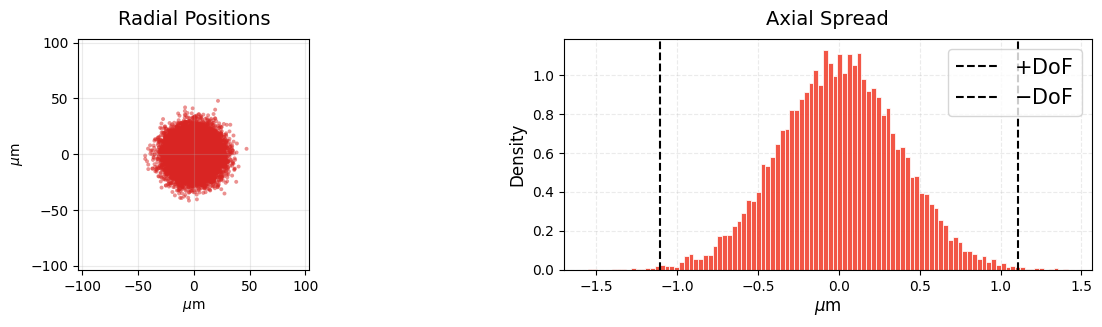

In [4]:

# Plot Cloud


pixelSize = 4.6e-6
magnification = 8
pixelNumber = 360

conversionFactor = pixelSize/magnification


planarLim = pixelNumber*conversionFactor/2 * 1e6

NA = 0.6
refractiveIndex = 1 
wavelength = baseAtom.transitions[0].Lambda
DoF = refractiveIndex*wavelength/(NA**2) *1e6

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

#axes[0].set_xticks([])
#axes[0].set_yticks([])
    
axes[0].scatter(
        atomPositions[:,0]*1e6,
        atomPositions[:,1]*1e6,
        s=8,
        alpha=0.5,
        color=cm.Reds(0.7),
        edgecolors='none'
    )
axes[0].set_xlim(-planarLim,planarLim)
axes[0].set_ylim(-planarLim,planarLim)
axes[0].set_xlabel(r'$\mu$m')
axes[0].set_ylabel(r'$\mu$m')
axes[0].set_title(f'Radial Positions',fontsize=14, pad=10)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.25)
    
axes[1].hist(
    atomPositions[:,2]*1e6,
    bins=100,
    density=True,
    color=cm.Reds(0.6),
    edgecolor='white',
    linewidth=0.6,
    alpha=0.9
)


axes[1].set_xlabel(r'$\mu$m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Axial Spread', fontsize=14, pad=10)

axes[1].axvline(+DoF, color='black', linestyle='--', linewidth=1.5, label=r'$+\mathrm{DoF}$')
axes[1].axvline(-DoF, color='black', linestyle='--', linewidth=1.5, label=r'$-\mathrm{DoF}$')


# Clean up appearance
axes[1].grid(True, which='major', alpha=0.25, linestyle='--')
axes[1].set_axisbelow(True)
axes[1].legend(fontsize = 15)

'''
fig.suptitle(
    rf'$k = {k},\ T_0 = {initialT * 1e6:.2f}\ \mu\mathrm{{K}},\ N = {nOfAtoms},\ Painting = {painting}$',
    fontsize=16,
    y=1.05
)
'''
        




# Cloud Spread in Tweezers after ToF

In [5]:
# Monte Carlo Sampling for Atoms Initial Positions and Velocities in ODT

import os


working_directory = "D:/PhD_Trieste/Simulations/Imaging_Simulation"

if os.getcwd()!= working_directory:
    os.chdir(working_directory)  
    
print(working_directory)

import Simulations_Libraries.trajectory_library as trajlib
import numpy as np
import matplotlib.pyplot as plt
from Camera import *
from scipy.stats import poisson
from scipy.optimize import curve_fit
import Simulations_Libraries.general_library as genlib
import scipy.constants as const
import matplotlib.cm as cm
%matplotlib

plt.ion()




normal = ""
usedCase = normal




'''-----------------------------------atom----------------------------------'''
nOfAtoms = 10000
isotope = 171
baseAtom = trajlib.Ytterbium(0,0,0, 0,0,0,isotope=isotope)

#initialT =np.arange(10,105,5)*1e-6
#initialT = np.array([50])*1e-6
initialT = 20e-6

h = const.physical_constants["Planck constant"] [0]
hbar = h/(2*np.pi)
kB = const.physical_constants["Boltzmann constant"][0]




'''-------------------------------Tweezer laser-----------------------------'''



painting = False

trapFreqX = 2 * np.pi * 140e3
trapFreqY = 2*np.pi*140e3 
trapFreqZ =  2*np.pi*29e3



    
n_0X = trajlib.n_T(trapFreqX,initialT)
n_0Y = trajlib.n_T(trapFreqY,initialT)
n_0Z = trajlib.n_T(trapFreqZ,initialT)

x_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqX)*(2*n_0X+1))
y_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqY)*(2*n_0Y+1))
z_rms = np.sqrt(trajlib.hbar/(2*baseAtom.m*trapFreqZ)*(2*n_0Z+1))
    
v_x_rms = np.sqrt(trajlib.hbar*trapFreqX/(2*baseAtom.m)*(2*n_0X+1))
v_y_rms = np.sqrt(trajlib.hbar*trapFreqY/(2*baseAtom.m)*(2*n_0Y+1))
v_z_rms = np.sqrt(trajlib.hbar*trapFreqZ/(2*baseAtom.m)*(2*n_0Z+1))

RelErrorPositionsRMS = []
RelErrorVelocitiesRMS = []


atomPositions = []
atomVelocities = []

# Using the sigma of the cloud after ToF
freeFlightTime = 90e-6
x_rms = np.sqrt(initialT*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreqX**2) + (freeFlightTime**2))
y_rms = np.sqrt(initialT*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreqY**2) + (freeFlightTime**2))
z_rms = np.sqrt(initialT*trajlib.kB/baseAtom.m) * np.sqrt((1/trapFreqZ**2) + (freeFlightTime**2))
    
for i in range(nOfAtoms):
        
    atomPositions.append(np.random.normal(0, [x_rms, y_rms, z_rms], size=(3)))
    atomVelocities.append(np.random.normal(0, [v_x_rms, v_y_rms, v_z_rms], size=(3)))
			
atomPositions = np.asarray(atomPositions)
atomVelocities = np.asarray(atomVelocities)
    

        
    
x_rms_MC = np.sqrt(np.mean(atomPositions[:,0]**2))
y_rms_MC = np.sqrt(np.mean(atomPositions[:,1]**2))
z_rms_MC = np.sqrt(np.mean(atomPositions[:,2]**2))
    
v_x_rms_MC = np.sqrt(np.mean(atomVelocities[:,0]**2))
v_y_rms_MC = np.sqrt(np.mean(atomVelocities[:,1]**2))
v_z_rms_MC = np.sqrt(np.mean(atomVelocities[:,2]**2))
   

RelErrorPositionsRMS = np.array([x_rms_MC/x_rms, y_rms_MC/y_rms, z_rms_MC/z_rms])
RelErrorVelocitiesRMS = np.array([v_x_rms_MC/v_x_rms, v_y_rms_MC/v_y_rms, v_z_rms_MC/v_z_rms])

print('\n\nRelative Errors:\n  Positions: ',RelErrorPositionsRMS,'\n  Velocities: ',RelErrorVelocitiesRMS)


D:/PhD_Trieste/Simulations/Imaging_Simulation
Using matplotlib backend: module://matplotlib_inline.backend_inline


Relative Errors:
  Positions:  [0.99545482 0.99463067 1.0033794 ] 
  Velocities:  [1.00088302 0.99575725 0.98835112]


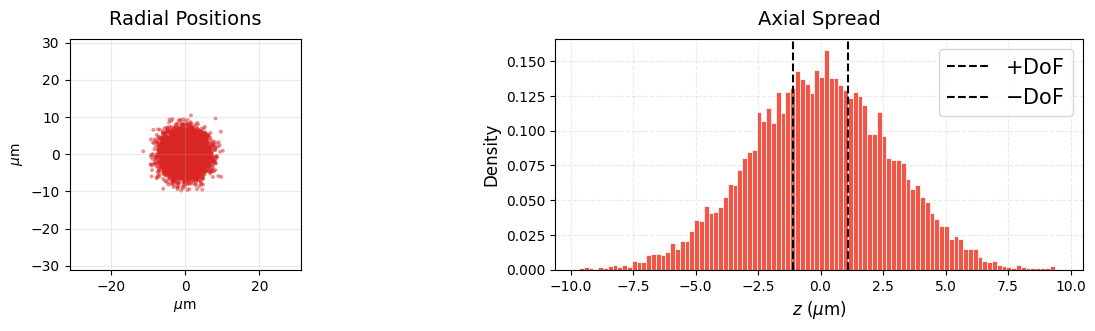

In [6]:

# Plot Cloud


pixelSize = 4.6e-6
magnification = 8
pixelNumber = 108

conversionFactor = pixelSize/magnification


planarLim = pixelNumber*conversionFactor/2 * 1e6

NA = 0.6
refractiveIndex = 1 
wavelength = baseAtom.transitions[0].Lambda
DoF = refractiveIndex*wavelength/(NA**2) *1e6

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

#axes[0].set_xticks([])
#axes[0].set_yticks([])
    
axes[0].scatter(
        atomPositions[:,0]*1e6,
        atomPositions[:,1]*1e6,
        s=8,
        alpha=0.5,
        color=cm.Reds(0.7),
        edgecolors='none'
    )
axes[0].set_xlim(-planarLim,planarLim)
axes[0].set_ylim(-planarLim,planarLim)
axes[0].set_xlabel(r'$\mu$m')
axes[0].set_ylabel(r'$\mu$m')
axes[0].set_title(f'Radial Positions',fontsize=14, pad=10)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.25)
    
axes[1].hist(
    atomPositions[:,2]*1e6,
    bins=100,
    density=True,
    color=cm.Reds(0.6),
    edgecolor='white',
    linewidth=0.6,
    alpha=0.9
)


axes[1].set_xlabel(r'$z$ ($\mu$m)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Axial Spread', fontsize=14, pad=10)

axes[1].axvline(+DoF, color='black', linestyle='--', linewidth=1.5, label=r'$+\mathrm{DoF}$')
axes[1].axvline(-DoF, color='black', linestyle='--', linewidth=1.5, label=r'$-\mathrm{DoF}$')


# Clean up appearance
axes[1].grid(True, which='major', alpha=0.25, linestyle='--')
axes[1].set_axisbelow(True)
axes[1].legend(fontsize = 15)


        


